Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library1 or otherwise. You should
research the task first and include references and a description of your algorithm.

# Code

In [4]:
def sqroot():

    # set a value of x
    x = 2
    #storing a value for 10**100 to be used in the while loop
    power = 10**100
    # getting a value for 2 that is 100 places above the decimal point
    x *=(10**(200))
    #initialize y
    y = 0
    
    # A loop to generate the square root of 2 value
    while y!=power:
        y = power
        power = (y + ( x // y)) >> 1
        
    # variable value stores a list of the while loop output
    value = list(str(power))
    
    # insert a dot after 1 place in the list
    value.insert(1, '.')
    
    # store the list values in a variable to be returned to user of the function
    ans = ''.join(value)
    
    # return the answer
    return ans

# call function
sqroot()

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

# Analysis

For this task I created a function called sqroot to output the result.
The x value is 2.The x variable is then times by 10 beforeit is exponentiated by 200 to get a value for x that is 100 decimals places above the decimal point.A variable y is created for the while loop and initialized at 0. A variable power is set to 10  exponentiated by 100. The while loop runs until y = power. Inside the while loop y is set to power while power is set to y + (x divided y) before being converted into a binary format and then the operations will be performed bit by bit.
The result of the while loop is soted in power before being added cast to a string and added to a list called value. A dot seperator is added to be used after the first value in the list.
The list value variables are then saved in a variable called ans. The ans variable is returned at the end of the function. 

# References

Powers function in python:https://docs.python.org/3/tutorial/introduction.html <br />
Square root:https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python <br />
formating python:https://www.geeksforgeeks.org/precision-handling-python/ <br />
code: https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-withoutimporting-a-libra <br />
Undestanding Newtons method: https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/ <br />
    https://www.youtube.com/watch?v=2158QbsunA8&ab_channel=LorenzoSadun <br />
To understand how to add a dot seperator to list: https://realpython.com/python-string-split-concatenate-join/ <br />
Generating a square root value: https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2

# Task 2

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

# Table

In [9]:
headings = ["A","B","C","D"]
data =[[ 90, 60, 104, 95],[ 30, 50, 51, 20],[30, 40, 45, 35]]
format_row = "{:>10}" * (len(headings) + 1)
print(format_row.format("", *headings))
for team, row in zip(headings, data):
    print(format_row.format(team, *row)) 

                   A         B         C         D
         A        90        60       104        95
         B        30        50        51        20
         C        30        40        45        35


# Code

In [ ]:
import scipy.stats as stats
  
# data stored in a 2-D array from the table provided
data = [[ 90, 60, 104, 95],[ 30, 50, 51, 20],[30, 40, 45, 35]]
#set a significant value
sigValue = 24.6
stat, p, dof, expected = stats.chi2_contingency(data) 

print("p value is " + str(p)) 

print("Expected")
print(expected)

print("Dof = ", dof)
print("Stat = ", stat)

# Analysis

The result received in this test is 24.57. This is lower than the significant value of 24.6. The difference is 0.03. A null hypothesis can now not be accepted because we can see that there is a relationship between the 2 categories. The value we get for p also reaffirms this conclusion.

# References

Undestanding Chi-Square test: https://stattrek.com/chi-square-test/independence.aspx
https://www.investopedia.com/terms/c/chi-square-statistic.asp#:~:text=A%20chi%2Dsquare%20(%CF%872,compares%20to%20actual%20observed%20data.&text=The%20chi%2Dsquare%20statistic%20compares,of%20variables%20in%20the%20relationship)
Understanding desgrees of freedom:https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/
Scipy docs:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

# Task 3

The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))** 2)/len(x)).
However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S .
The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 
Note that part of this taskis to figure out the terminology in the previous sentence.

# Research

Understanding Stdev in excel:https://www.youtube.com/watch?v=NdIVwuwfMIg&ab_channel=DesigneLearningTutorials <br />
http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html <br />
Stdev.p is used to find the standard deviation of all the data acquired. The p stands for population. In excel, you run the formula while selecting all data cells in the spreadsheet to find the result.
Stdev.s is used to calculate the standard deviation of a sample of the data required. In excel you choose a select number of data cells and run the formula to find the standard deviation of those selected cells.

# Code

# Standard Deviation Population Test

In [21]:
import numpy as np
#data is random results of a test in % format - 25 in total
data = ([75,22,82,48,51,92,72,64,38,57,62,79,88,28,53,83,75,66,43,52,78,91,85,34,58])
print("standard deviation population result")
#formula for sample - np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
np.sqrt(np.sum((data - np.mean(data))**2)/len(data))

standard deviation population result


19.777724843874232

# Standard Deviation Sample Test

In [5]:
import numpy as np
#data is random results of a test in % format - 25 in total
data = ([75,22,82,48,51,92,72,64,38,57,62,79,88,28,53,83,75,66,43,52,78,91,85,34,58])
print("standard deviation sample result")
np.sqrt(np.sum((data - np.mean(data))**2)/len(data)-1)

standard deviation sample result


19.75242769889312

# Analysis

The results of both tests gives the user a basis of where the standard deviation of the tests is based. Stdev.p = 19.78(to 2 decimal places) while stdev.s = 17.75(to two decimal places). The difference to two decimal places is 0.03. This gives the user an understanding that the data is mainly between 20% of the mean.
Using Stdev.s gives the user a better understanding of what the standard deviaton is because it will offer a greater fluctuation of results due it taking only select results that are randomly choosen from the data provided.When the data provided gets larger, the population result can change rapidly because alot of people could score around the same mark.This will skew the data and give out a result that may not accurately reflect the data provided to give the best outcome. Due to this using the sample standard deviation formula allows the data to be randomly choosen and give a better outcome because the data provided will be of a greater variance. 
With the data provided in the above code size was not 25 but 2500 and 5-% of the results are between 45-55, this will cause the standard dev population to be a much lower number than the number calculated in this file.

# Task 4

NB – when I first posted this task, I accidentally
wrote “k-means” where I meant to write “kNN” for k Nearest Neighbours. Because of this, I will allow either algorithm to be used and have
extended the deadline by two weeks. Use scikit-learn to apply k-means
clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data
set online. Explain in a Markdown cell how your code works and how accurate it
might be, and then explain how your model could be used to make predictions of
species of iris

# Code

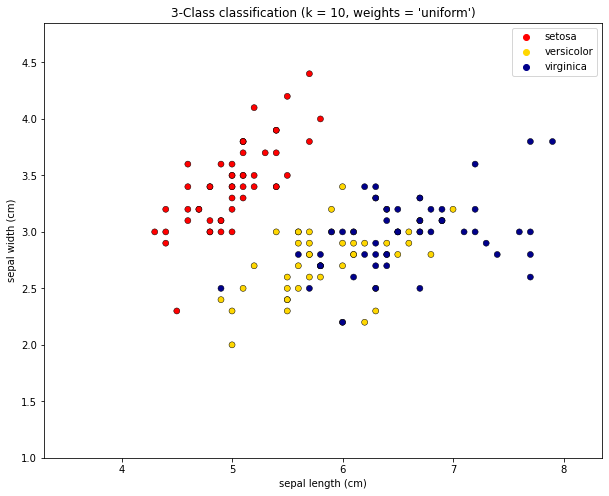

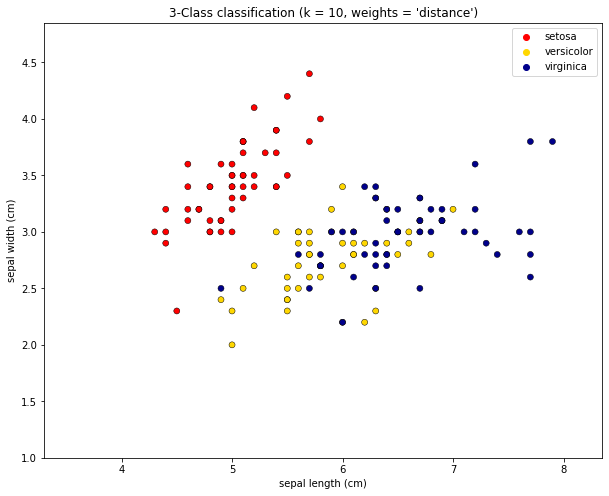

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import the iris dataset
iris = datasets.load_iris()
#print(iris) - debug line to check if data has been imported
# take the first 2 features and store in x. 
X = iris.data[:, :2]
y = iris.target
h = .05  # step size in the mesh

#Add colour to the graph
cmap_light = ListedColormap(['white'])
cmap_bold = ['red', 'gold', 'darkblue']


for weights in ['uniform', 'distance']:    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

# Analysis

How the code works

Accuracy of algorithm



[[15  0  0]
 [ 0  9  1]
 [ 0  0  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

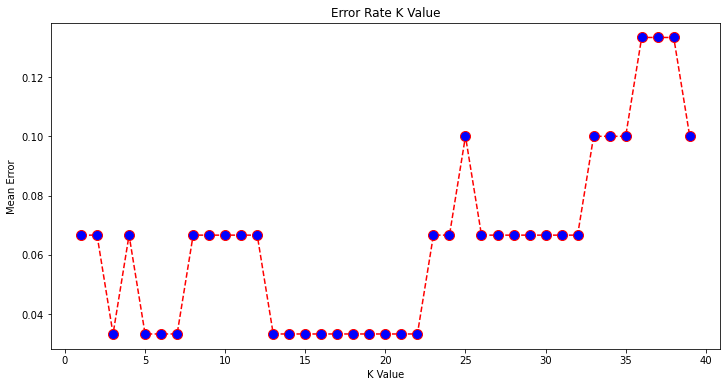

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')